# Preparation

Installing necessary packages

In [3]:
!pip install datasets
!pip install pandas
!pip install openai
!pip install tiktoken
!pip install matplotlib

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import tiktoken

Downloading the full dataset to disk

In [5]:
# URL of the JSONL file
url = "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_Amazon_Fashion.jsonl"

# Local filename to save the file
output_file = "meta_Amazon_Fashion.jsonl"

# Send GET request
response = requests.get(url, stream=True)

# Check if request was successful
if response.status_code == 200:
    with open(output_file, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"File downloaded successfully and saved as '{output_file}'")
else:
    print(f"Failed to download file. Status code: {response.status_code}")



File downloaded successfully and saved as 'meta_Amazon_Fashion.jsonl'


# Qualitative exploration

Importing an extract of the dataset

In [6]:
# Path to the JSONL file
file_path = "meta_Amazon_Fashion.jsonl"

# Read the first 10000 lines manually
with open(file_path, 'r', encoding='utf-8') as f:
    lines = [next(f) for _ in range(10000)]

# Convert the lines (as strings) into a DataFrame
extract_df = pd.read_json(''.join(lines), lines=True)

<ipython-input-6-d836a2f17d61>:9: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  extract_df = pd.read_json(''.join(lines), lines=True)


In [7]:
extract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    10000 non-null  object 
 1   title            10000 non-null  object 
 2   average_rating   10000 non-null  float64
 3   rating_number    10000 non-null  int64  
 4   features         10000 non-null  object 
 5   description      10000 non-null  object 
 6   price            1104 non-null   float64
 7   images           10000 non-null  object 
 8   videos           10000 non-null  object 
 9   store            9668 non-null   object 
 10  categories       10000 non-null  object 
 11  details          10000 non-null  object 
 12  parent_asin      10000 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [8]:
extract_df.head(5)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,AMAZON FASHION,YUEDGE 5 Pairs Men's Moisture Control Cushione...,4.6,16,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GiveGift,[],{'Package Dimensions': '10.31 x 8.5 x 1.73 inc...,B08BHN9PK5,NaN
1,AMAZON FASHION,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,4.1,7,"[Drawstring closure, Machine Wash]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],DouBCQ,[],{'Package Dimensions': '15 x 10.2 x 0.4 inches...,B08R39MRDW,NaN
2,AMAZON FASHION,Pastel by Vivienne Honey Vanilla Girls' Trapez...,4.3,11,"[Zipper closure, Hand Wash Only]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pastel by Vivienne,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B077KJHCJ4,NaN
3,AMAZON FASHION,Mento Streamtail,2.0,1,"[Thermoplastic Rubber sole, High Density Premi...",[Slip on the Women's Mento and you're ready to...,29.81,[{'thumb': 'https://m.media-amazon.com/images/...,[],Guy Harvey,[],{'Package Dimensions': '11.22 x 4.72 x 4.33 in...,B0811M2JG9,NaN
4,AMAZON FASHION,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"[Pull On closure, Size Guide: ""S"" fits calf 10...",[Ronnox Calf Sleeves - Allowing Your Body to P...,17.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST Review: RONNOX Women's 3-Pa...,RONNOX,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,NaN


Let's check randomly the content of the text fields: title / description / features

In [9]:
random_rows = extract_df.sample(n=5)

# Print the content of the "description" column for the selected rows
print("Randomly selected titles:")
for t in random_rows['title'].to_list():
  print(t)
print("============================================================")
print("============================================================")
print("Randomly selected descriptions:")
for d in random_rows['description'].to_list():
  print(d)
print("============================================================")
print("============================================================")
print("Randomly selected features:")
for f in random_rows['features'].to_list():
  print(f)
print("============================================================")
print("============================================================")
print("Randomly selected categories:")
for c in random_rows['categories'].to_list():
  print(c)
print("============================================================")
print("============================================================")
print("Randomly selected details:")
for x in random_rows['details'].to_list():
  print(x)
print("Randomly selected images:")
for i in random_rows['images'].to_list():
  print(i)

Randomly selected titles:
8 Pieces Old Man Costume Grandpa Costume Kit, Wig Walking Cane Glasses Faux Eyebrows Artificial Mustache Long Faux Beard Suspenders and Bow Tie for Halloween (Dark Gray,Classic)
Women Casual Loose Turn Down Collar Solid Color V Neck Long Sleeve Button Down Shirts Blouse Top Plus Size Size XXL(US 10-12) (White)
Huk Men's Double Header Ice Blue XXL
Nightmare on Elm Street Freddy Krueger Airbrushed Face Men's Shirt, Large
WOOSEA Women's Short Sleeve Colorblock Slim Bodycon Business Pencil Dress (X-Large, Black+Red)
Randomly selected descriptions:
['Features:Widely applicable: This old man wig set is suitable for sharing among friends at Halloween parties, graduation parties, dress up events, science theme costume party, novelty fancy dress gatherings, or even as a regular party accessory.Easy to apply: You can wear the mesh cap first, then wear the wig; And the fake mustache eyebrows set is self-adhesive, you just need to peel off the white film on the back of th

## Conclusions

ID
*   `parent_asin` looks like a primary key as it is unique for each row and never null (*to be confirmed in quantitative analysis*)

TEXT
*   `title` seems to be the most relevant column for semantic searching as it contains most of the info. It is almost never empty (*to be confirmed in quantitative analysis*)
*   `description` is a relevant column for semantic searching too as it is more about the style and the way of wearing the item. It seems to be regularly empty though (*to be confirmed in quantitative analysis*)
*   `features` is still relevant semantically but it is fairly technical and focusing on materials. It seems to be regularly empty though (*to be confirmed in quantitative analysis*)
*   `details` is irrelevant semantically because it is pure technical dimensioning / materials
*   `categories` seems to be very regularly empty (*to be checked in quantitative analysis*)

MEDIA
*   `images` contains a reference to a thumbnail picture which might relevant for text to image search using [CLIP](https://openai.com/index/clip/). These images are available in various resolutions which can be interesting to see how much this can cost. However, these images are sometimes linking to "No Image available" reference from Amazon.
*   `videos` sometimes contains a reference to a video that we could divide into image and embed through CLIP. This is considered too time consuming for this project (compared to its added value) so it will not explored here.

NUMERICAL
*   `average_rating` / `rating_number` / `price` will have a fairly low importance in our key semantic search workflow considering their numerical nature.

NOT PROVIDED
*   `bought_together` is visibly not provided (*to be checked in quantitative analysis*)



# Quantitative analysis

Loading the full dataset for quantitative analysis

In [10]:
# Path to your .jsonl file
file_path = "meta_Amazon_Fashion.jsonl"

# Load JSONL into a pandas DataFrame
full_df = pd.read_json(file_path, lines=True)

Is parent_asin an actual primary key ?

In [11]:
def is_primary_key(df, column_name="id"):
    return df[column_name].is_unique and df[column_name].notnull().all()

# Usage
if "parent_asin" in full_df.columns:
    if is_primary_key(full_df, "parent_asin"):
        print("✅ 'parent_asin' is a valid primary key.")
    else:
        print("❌ 'parent_asin' is NOT a valid primary key.")

✅ 'parent_asin' is a valid primary key.


How many items do we have here ?

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826108 entries, 0 to 826107
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    826108 non-null  object 
 1   title            826108 non-null  object 
 2   average_rating   826108 non-null  float64
 3   rating_number    826108 non-null  int64  
 4   features         826108 non-null  object 
 5   description      826108 non-null  object 
 6   price            50249 non-null   float64
 7   images           826108 non-null  object 
 8   videos           826108 non-null  object 
 9   store            799270 non-null  object 
 10  categories       826108 non-null  object 
 11  details          826108 non-null  object 
 12  parent_asin      826108 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 88.2+ MB


How many items actually have a description / features / title / categories / images ?

In [13]:
def plot_array_stats(df, column_name, scale):
  length_name = column_name+"_length"
  # Get the length of each array in the 'arrays' column
  df[length_name] = df[column_name].apply(len)

  print(f"% of empty arrays in {column_name}: {100.0*(df[length_name].eq(0).sum()/df[length_name].count())} %")
  print(f"Average {column_name} length: {df[length_name].mean()}")
  print(f"Maximum {column_name} length: {df[length_name].max()}")

  print("============================================================")
  print("============================================================")
  # Plot the histogram of the lengths
  plt.figure(figsize=(8, 6))
  plt.hist(df[length_name], bins=100, edgecolor='black', color='skyblue')
  plt.title(column_name)
  plt.xlabel('Length of arrays in column: ' + column_name)
  plt.ylabel('Frequency')
  plt.yscale(scale)
  plt.show()

% of empty arrays in description: 92.82309334856944 %
Average description length: 0.18155011209188146
Maximum description length: 101


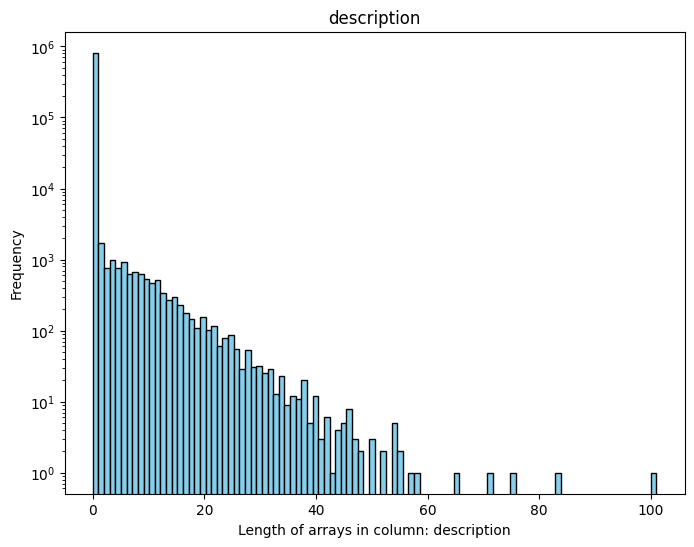

In [14]:
plot_array_stats(full_df, "description", "log")

% of empty arrays in features: 43.9451016089906 %
Average features length: 1.2314443147869285
Maximum features length: 26


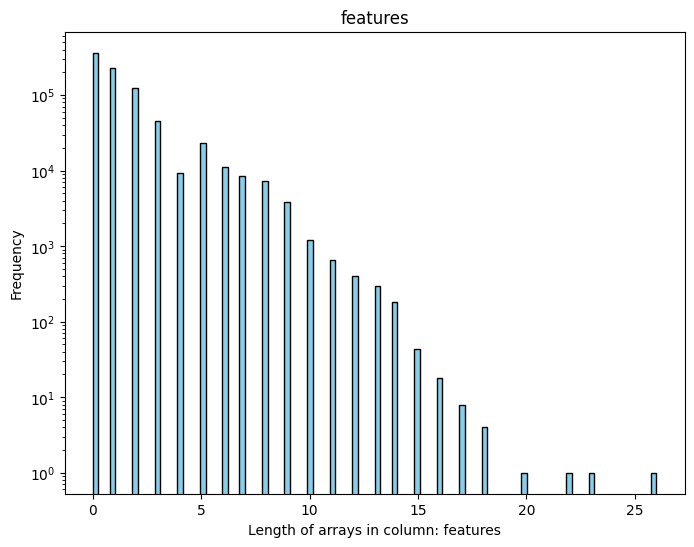

In [15]:
plot_array_stats(full_df, "features", "log")

% of empty arrays in categories: 100.0 %
Average categories length: 0.0
Maximum categories length: 0


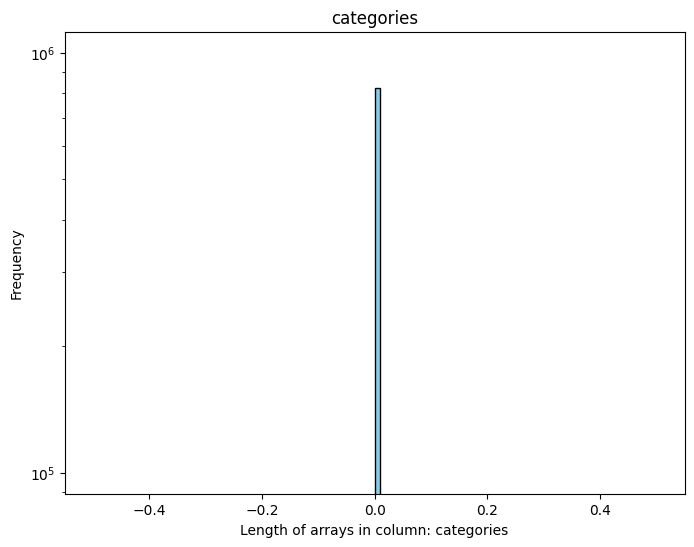

In [16]:
plot_array_stats(full_df, "categories", "log")

% of empty arrays in images: 0.00012104954800098777 %
Average images length: 4.553578950936197
Maximum images length: 31


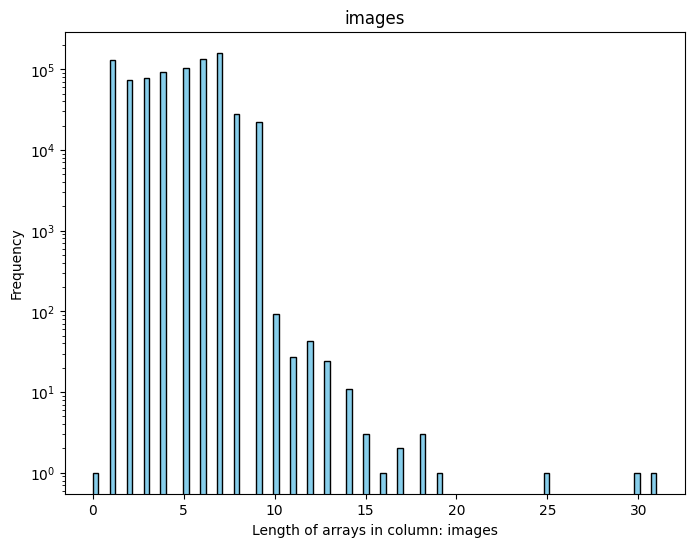

In [17]:
plot_array_stats(full_df, "images", "log")

In [18]:
def contains_default_amazon_image(image_array):
  for dico in image_array:
    if dico['thumb'] == 'https://m.media-amazon.com/images/I/01RmK+J4pJL._AC_SR38,50_.gif':
      return True
  return False
full_df["default_image"] = full_df["images"].apply(contains_default_amazon_image)

print("% of default image in images: " + str(round(100.0*(full_df["default_image"].eq(True).sum() / full_df["default_image"].count()),2)) +  " %")

% of default image in images: 1.32 %


What are the token_size statistics in description and title ? This is a dimensioning factor for our embedding generation bill.

In [19]:
# We will be using embedding text-embedding-3-small (and text-embedding-3-large)
# so the relevant tokenizer is cl100k_base

# Load the tokenizer used by text-embedding-3 models
encoding = tiktoken.get_encoding("cl100k_base")

# Function to count tokens
def count_tokens(text):
    if pd.isnull(text):
        return 0
    return len(encoding.encode(str(text)))

def print_token_stats(df, column_name):
    string_name = column_name + "_string"
    if column_name=="title":
      df[string_name] = df[column_name]
    else:
      df[string_name] = df[column_name].apply(lambda x: ' '.join(x))
    stat_name = column_name+"token_count"
    # Apply the count_tokens function to the specified column
    df[stat_name] = df[string_name].apply(count_tokens)
    # Get stats
    avg_tokens = df[stat_name].mean()
    min_tokens = df[stat_name].min()
    max_tokens = df[stat_name].max()
    total_tokens = df[stat_name].sum()
    # Using text-embedding-3-large to have an upper bound
    total_cost_embedding = (total_tokens/1000.0) * 0.00013
    # Printing
    print(f"Average {column_name} tokens: {avg_tokens}")
    print(f"Minimum {column_name} tokens: {min_tokens}")
    print(f"Maximum {column_name} tokens: {max_tokens}")
    print(f"Total {column_name} tokens: {total_tokens}")
    print(f"Total cost of embedding {column_name} for text-embedding-3-large: {round(total_cost_embedding, 2)} USD")


In [20]:
full_df['title_array'] = full_df['title'].apply(lambda x: [x])
print_token_stats(full_df, "title_array")

Average title_array tokens: 23.217940027211938
Minimum title_array tokens: 0
Maximum title_array tokens: 423
Total title_array tokens: 19180526
Total cost of embedding title_array for text-embedding-3-large: 2.49 USD


In [21]:
print_token_stats(full_df, "description")

Average description tokens: 9.041219792085297
Minimum description tokens: 0
Maximum description tokens: 2989
Total description tokens: 7469024
Total cost of embedding description for text-embedding-3-large: 0.97 USD


In [22]:
print_token_stats(full_df, "features")

Average features tokens: 13.35176151302251
Minimum features tokens: 0
Maximum features tokens: 1467
Total features tokens: 11029997
Total cost of embedding features for text-embedding-3-large: 1.43 USD


In [23]:
full_df['concatenated_arrays'] = (
    full_df
    .apply(
        lambda row: row['title_array'] + row['description'] + row['features'],
        axis=1
    )
)
print_token_stats(full_df, "concatenated_arrays")

Average concatenated_arrays tokens: 45.57489819733013
Minimum concatenated_arrays tokens: 0
Maximum concatenated_arrays tokens: 3013
Total concatenated_arrays tokens: 37649788
Total cost of embedding concatenated_arrays for text-embedding-3-large: 4.89 USD


## Conclusions

ID
*   `parent_asin` is a primary key.

TEXT
*   `title` / `description` / `features` can be embedded for a RAG using text-embedding-3-large without going over a nudget of 10USD.
*   `title` + `description` + `features` concatenated number of tokens seems reasonable to avoid chunking (as done for RAG on large documents).
*   `categories` is always empty.

MEDIA
*   `images` are provided for more than 99.99% products. Nevertheless, 1.32 % of images are the Amazon default : Amazon no image.



NOT PROVIDED
*   `bought_together` is not provided.



In [24]:
print()